In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/barcelona2021-2022/goal_shotcreation.csv
/kaggle/input/barcelona2021-2022/passing_report.csv
/kaggle/input/barcelona2021-2022/poessession_report.csv
/kaggle/input/barcelona2021-2022/laliga_shooting_report.csv
/kaggle/input/barcelona2021-2022/match_report_2021-22.csv
/kaggle/input/bmw-worldwide-sales-records-20102024/BMW sales data (2010-2024) (1).csv
/kaggle/input/formula-1-world-championship-1950-2020/races.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv
/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv
/kaggle/input/formula-1-world-championship-1950-2020/status.csv
/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv
/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv
/kaggle/input/formula

In [3]:
#instalacja odpowiednich bibliotek
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/kaggle/input/barcelona2021-2022/match_report_2021-22.csv")
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-15,20:00 (23:30),La Liga,Matchweek 1,Sun,Home,W,4.0,2.0,Real Sociedad,3.1,1.1,62.0,20384.0,Sergio Busquets,4-3-3,Alejandro Hernández,Match Report,NaN
2,2021-08-21,22:00 (01:30),La Liga,Matchweek 2,Sat,Away,D,1.0,1.0,Athletic Club,1.4,1.5,67.0,9394.0,Sergio Busquets,4-3-3,Juan Martínez,Match Report,NaN
3,2021-08-29,17:00 (20:30),La Liga,Matchweek 3,Sun,Home,W,2.0,1.0,Getafe,1.2,0.4,66.0,26543.0,Sergio Busquets,4-3-3,Pablo González,Match Report,NaN
4,2021-09-14,21:00 (00:30),Champions Lg,Group stage,Tue,Home,L,0.0,3.0,de Bayern Munich,0.2,2.7,49.0,39737.0,Sergio Busquets,3-1-4-2,Michael Oliver,Match Report,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          53 non-null     object 
 1   Time          53 non-null     object 
 2   Comp          53 non-null     object 
 3   Round         53 non-null     object 
 4   Day           53 non-null     object 
 5   Venue         53 non-null     object 
 6   Result        53 non-null     object 
 7   GF            53 non-null     float64
 8   GA            53 non-null     float64
 9   Opponent      53 non-null     object 
 10  xG            50 non-null     float64
 11  xGA           50 non-null     float64
 12  Poss          53 non-null     float64
 13  Attendance    51 non-null     float64
 14  Captain       53 non-null     object 
 15  Formation     53 non-null     object 
 16  Referee       53 non-null     object 
 17  Match Report  53 non-null     object 
 18  Notes         8 non-null      ob

In [5]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-15,20:00 (23:30),La Liga,Matchweek 1,Sun,Home,W,4.0,2.0,Real Sociedad,3.1,1.1,62.0,20384.0,Sergio Busquets,4-3-3,Alejandro Hernández,Match Report,NaN
2,2021-08-21,22:00 (01:30),La Liga,Matchweek 2,Sat,Away,D,1.0,1.0,Athletic Club,1.4,1.5,67.0,9394.0,Sergio Busquets,4-3-3,Juan Martínez,Match Report,NaN
3,2021-08-29,17:00 (20:30),La Liga,Matchweek 3,Sun,Home,W,2.0,1.0,Getafe,1.2,0.4,66.0,26543.0,Sergio Busquets,4-3-3,Pablo González,Match Report,NaN
4,2021-09-14,21:00 (00:30),Champions Lg,Group stage,Tue,Home,L,0.0,3.0,de Bayern Munich,0.2,2.7,49.0,39737.0,Sergio Busquets,3-1-4-2,Michael Oliver,Match Report,NaN
5,2021-09-20,21:00 (00:30),La Liga,Matchweek 5,Mon,Home,D,1.0,1.0,Granada,1.8,0.7,76.0,27097.0,Sergio Busquets,4-3-3,Santiago Jaime,Match Report,NaN
6,2021-09-23,22:00 (01:30),La Liga,Matchweek 6,Thu,Away,D,0.0,0.0,Cádiz,0.6,1.4,67.0,12180.0,Sergio Busquets,4-3-3,Carlos del Cerro,Match Report,NaN
7,2021-09-26,16:15 (19:45),La Liga,Matchweek 7,Sun,Home,W,3.0,0.0,Levante,3.1,0.7,70.0,35334.0,Sergio Busquets,4-2-3-1,Isidro Díaz de Mera,Match Report,NaN
8,2021-09-29,20:00 (00:30),Champions Lg,Group stage,Wed,Away,L,0.0,3.0,pt Benfica,1.2,1.9,59.0,29454.0,Sergio Busquets,3-4-1-2,Daniele Orsato,Match Report,NaN
9,2021-10-02,21:00 (00:30),La Liga,Matchweek 8,Sat,Away,L,0.0,2.0,Atlético Madrid,0.9,1.3,70.0,60594.0,Sergio Busquets,4-2-3-1,César Soto,Match Report,NaN


In [6]:
#informacja ile wierszy i kolumn zawiera tabela z danymi
print(df.shape)

(54, 19)


In [7]:
#czyszczenie danych
missing = df.isna().sum().sort_values(ascending = False)
missing[missing>0] #pokaz kolumny z brakami

Notes           46
xG               4
xGA              4
Attendance       3
Match Report     1
Referee          1
Formation        1
Captain          1
Poss             1
Date             1
Time             1
GA               1
GF               1
Result           1
Venue            1
Day              1
Round            1
Comp             1
Opponent         1
dtype: int64

In [8]:
#usuwanie wierszy gdzie mamy brak danych
df = df.dropna()

In [9]:
df

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
33,2022-02-17,18:45 (23:15),Europa Lg,Knockout round play-offs,Thu,Home,D,1.0,1.0,it Napoli,2.4,0.8,66.0,73525.0,Gerard Piqué,4-3-3,István Kovács,Match Report,Leg 1 of 2
35,2022-02-24,21:00 (01:30),Europa Lg,Knockout round play-offs,Thu,Away,W,4.0,2.0,it Napoli,1.9,1.3,56.0,37858.0,Sergio Busquets,4-3-3,Sergey Karasev,Match Report,Leg 2 of 2; Barcelona won
38,2022-03-10,21:00 (01:30),Europa Lg,Round of 16,Thu,Home,D,0.0,0.0,tr Galatasaray,1.6,0.2,68.0,61740.0,Jordi Alba,4-3-3,Benoît Bastien,Match Report,Leg 1 of 2
40,2022-03-17,20:45 (23:15),Europa Lg,Round of 16,Thu,Away,W,2.0,1.0,tr Galatasaray,2.4,0.7,67.0,50110.0,Sergio Busquets,4-3-3,Daniele Orsato,Match Report,Leg 2 of 2; Barcelona won
43,2022-04-07,21:00 (00:30),Europa Lg,Quarter-finals,Thu,Away,D,1.0,1.0,de Eint Frankfurt,0.9,1.4,65.0,48000.0,Sergio Busquets,4-3-3,Srđan Jovanović,Match Report,Leg 1 of 2
45,2022-04-14,21:00 (00:30),Europa Lg,Quarter-finals,Thu,Home,L,2.0,3.0,de Eint Frankfurt,2.6,2.0,74.0,79468.0,Sergio Busquets,4-3-3,Artur Dias,Match Report,Leg 2 of 2; Eint Frankfurt won


In [10]:
#wypisanie nazw wszystkich kolumn w naszej tabeli
print(df.columns)

Index(['Date', 'Time', 'Comp', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'xG', 'xGA', 'Poss', 'Attendance', 'Captain', 'Formation',
       'Referee', 'Match Report', 'Notes'],
      dtype='object')


In [11]:
#opisuje podstawowe operacje statystyczne takie jak np średnia, kwartyle na danych z tabeli (tylko liczbowych!)
df.describe()

,GF,GA,xG,xGA,Poss,Attendance
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.666667,1.333333,1.966667,1.066667,66.000000,58450.166667
std,1.366260,1.032796,0.640833,0.631401,5.830952,16016.395430
min,0.000000,0.000000,0.900000,0.200000,56.000000,37858.000000
25%,1.000000,1.000000,1.675000,0.725000,65.250000,48527.500000
50%,1.500000,1.000000,2.150000,1.050000,66.500000,55925.000000
75%,2.000000,1.750000,2.400000,1.375000,67.750000,70578.750000
max,4.000000,3.000000,2.600000,2.000000,74.000000,79468.000000


In [12]:
#liczba zwyciestw, remisow, porazek
df['Result'].value_counts()

Result
D    3
W    2
L    1
Name: count, dtype: int64

In [13]:
#sortowanie danych wzgledem frekwencji na stadionie (rosnaco)
df.sort_values(by = "Attendance", ascending = True).head()

,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
35,2022-02-24,21:00 (01:30),Europa Lg,Knockout round play-offs,Thu,Away,W,4.0,2.0,it Napoli,1.9,1.3,56.0,37858.0,Sergio Busquets,4-3-3,Sergey Karasev,Match Report,Leg 2 of 2; Barcelona won
43,2022-04-07,21:00 (00:30),Europa Lg,Quarter-finals,Thu,Away,D,1.0,1.0,de Eint Frankfurt,0.9,1.4,65.0,48000.0,Sergio Busquets,4-3-3,Srđan Jovanović,Match Report,Leg 1 of 2
40,2022-03-17,20:45 (23:15),Europa Lg,Round of 16,Thu,Away,W,2.0,1.0,tr Galatasaray,2.4,0.7,67.0,50110.0,Sergio Busquets,4-3-3,Daniele Orsato,Match Report,Leg 2 of 2; Barcelona won
38,2022-03-10,21:00 (01:30),Europa Lg,Round of 16,Thu,Home,D,0.0,0.0,tr Galatasaray,1.6,0.2,68.0,61740.0,Jordi Alba,4-3-3,Benoît Bastien,Match Report,Leg 1 of 2
33,2022-02-17,18:45 (23:15),Europa Lg,Knockout round play-offs,Thu,Home,D,1.0,1.0,it Napoli,2.4,0.8,66.0,73525.0,Gerard Piqué,4-3-3,István Kovács,Match Report,Leg 1 of 2


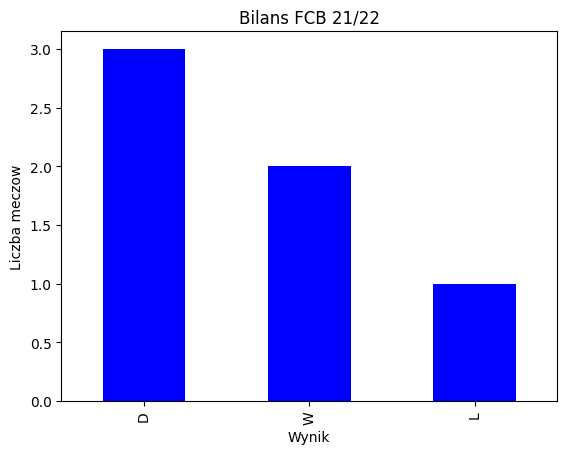

In [14]:
df['Result'].value_counts().plot(kind='bar', color='blue')
plt.title("Bilans FCB 21/22")
plt.xlabel("Wynik")
plt.ylabel("Liczba meczow") 
plt.show()

In [15]:
data = pd.read_csv("/kaggle/input/barcelona2021-2022/match_report_2021-22.csv")
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-15,20:00 (23:30),La Liga,Matchweek 1,Sun,Home,W,4.0,2.0,Real Sociedad,3.1,1.1,62.0,20384.0,Sergio Busquets,4-3-3,Alejandro Hernández,Match Report,NaN
2,2021-08-21,22:00 (01:30),La Liga,Matchweek 2,Sat,Away,D,1.0,1.0,Athletic Club,1.4,1.5,67.0,9394.0,Sergio Busquets,4-3-3,Juan Martínez,Match Report,NaN
3,2021-08-29,17:00 (20:30),La Liga,Matchweek 3,Sun,Home,W,2.0,1.0,Getafe,1.2,0.4,66.0,26543.0,Sergio Busquets,4-3-3,Pablo González,Match Report,NaN
4,2021-09-14,21:00 (00:30),Champions Lg,Group stage,Tue,Home,L,0.0,3.0,de Bayern Munich,0.2,2.7,49.0,39737.0,Sergio Busquets,3-1-4-2,Michael Oliver,Match Report,NaN
5,2021-09-20,21:00 (00:30),La Liga,Matchweek 5,Mon,Home,D,1.0,1.0,Granada,1.8,0.7,76.0,27097.0,Sergio Busquets,4-3-3,Santiago Jaime,Match Report,NaN
6,2021-09-23,22:00 (01:30),La Liga,Matchweek 6,Thu,Away,D,0.0,0.0,Cádiz,0.6,1.4,67.0,12180.0,Sergio Busquets,4-3-3,Carlos del Cerro,Match Report,NaN
7,2021-09-26,16:15 (19:45),La Liga,Matchweek 7,Sun,Home,W,3.0,0.0,Levante,3.1,0.7,70.0,35334.0,Sergio Busquets,4-2-3-1,Isidro Díaz de Mera,Match Report,NaN
8,2021-09-29,20:00 (00:30),Champions Lg,Group stage,Wed,Away,L,0.0,3.0,pt Benfica,1.2,1.9,59.0,29454.0,Sergio Busquets,3-4-1-2,Daniele Orsato,Match Report,NaN
9,2021-10-02,21:00 (00:30),La Liga,Matchweek 8,Sat,Away,L,0.0,2.0,Atlético Madrid,0.9,1.3,70.0,60594.0,Sergio Busquets,4-2-3-1,César Soto,Match Report,NaN


In [16]:
#w kolumnie Notes brak danych zamieniamy na Empty
values = {"Notes": 'Empty'}
data = data.fillna(value=values) 
data

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,Opponent,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Empty
1,2021-08-15,20:00 (23:30),La Liga,Matchweek 1,Sun,Home,W,4.0,2.0,Real Sociedad,3.1,1.1,62.0,20384.0,Sergio Busquets,4-3-3,Alejandro Hernández,Match Report,Empty
2,2021-08-21,22:00 (01:30),La Liga,Matchweek 2,Sat,Away,D,1.0,1.0,Athletic Club,1.4,1.5,67.0,9394.0,Sergio Busquets,4-3-3,Juan Martínez,Match Report,Empty
3,2021-08-29,17:00 (20:30),La Liga,Matchweek 3,Sun,Home,W,2.0,1.0,Getafe,1.2,0.4,66.0,26543.0,Sergio Busquets,4-3-3,Pablo González,Match Report,Empty
4,2021-09-14,21:00 (00:30),Champions Lg,Group stage,Tue,Home,L,0.0,3.0,de Bayern Munich,0.2,2.7,49.0,39737.0,Sergio Busquets,3-1-4-2,Michael Oliver,Match Report,Empty
5,2021-09-20,21:00 (00:30),La Liga,Matchweek 5,Mon,Home,D,1.0,1.0,Granada,1.8,0.7,76.0,27097.0,Sergio Busquets,4-3-3,Santiago Jaime,Match Report,Empty
6,2021-09-23,22:00 (01:30),La Liga,Matchweek 6,Thu,Away,D,0.0,0.0,Cádiz,0.6,1.4,67.0,12180.0,Sergio Busquets,4-3-3,Carlos del Cerro,Match Report,Empty
7,2021-09-26,16:15 (19:45),La Liga,Matchweek 7,Sun,Home,W,3.0,0.0,Levante,3.1,0.7,70.0,35334.0,Sergio Busquets,4-2-3-1,Isidro Díaz de Mera,Match Report,Empty
8,2021-09-29,20:00 (00:30),Champions Lg,Group stage,Wed,Away,L,0.0,3.0,pt Benfica,1.2,1.9,59.0,29454.0,Sergio Busquets,3-4-1-2,Daniele Orsato,Match Report,Empty
9,2021-10-02,21:00 (00:30),La Liga,Matchweek 8,Sat,Away,L,0.0,2.0,Atlético Madrid,0.9,1.3,70.0,60594.0,Sergio Busquets,4-2-3-1,César Soto,Match Report,Empty


In [17]:
data['Referee'].unique()

array([nan, 'Alejandro Hernández', 'Juan Martínez', 'Pablo González',
       'Michael Oliver', 'Santiago Jaime', 'Carlos del Cerro',
       'Isidro Díaz de Mera', 'Daniele Orsato', 'César Soto', 'Jesús Gil',
       'Clément Turpin', 'José Sánchez', 'Antonio Matéu Lahoz',
       'Jorge Figueroa', 'Ovidiu Hațegan', 'Sergey Karasev',
       'Alberola Rojas', 'Guillermo Cuadra', 'José Luis Munuera',
       'István Kovács', 'Benoît Bastien', 'Ricardo de Burgos',
       'Srđan Jovanović', 'Artur Dias', 'Miguel Ángel Ortiz Arias'],
      dtype=object)

In [18]:
#ile meczow sedziowal dany sedzia
ref=data['Referee'].value_counts()
print(ref)

Referee
Carlos del Cerro            5
Alejandro Hernández         4
Pablo González              4
José Luis Munuera           4
Jesús Gil                   3
Juan Martínez               3
Antonio Matéu Lahoz         3
Daniele Orsato              2
Isidro Díaz de Mera         2
José Sánchez                2
Santiago Jaime              2
Jorge Figueroa              2
Ovidiu Hațegan              2
Sergey Karasev              2
César Soto                  2
Guillermo Cuadra            2
Benoît Bastien              1
Artur Dias                  1
Srđan Jovanović             1
Ricardo de Burgos           1
Alberola Rojas              1
István Kovács               1
Michael Oliver              1
Clément Turpin              1
Miguel Ángel Ortiz Arias    1
Name: count, dtype: int64


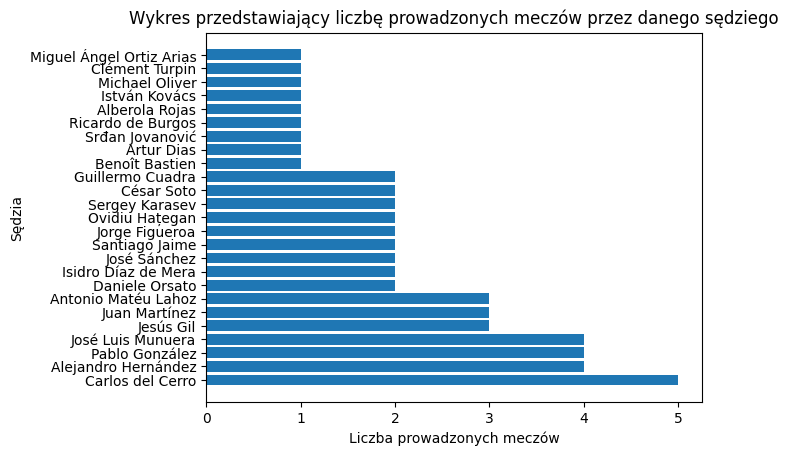

In [26]:
a = data['Referee'].unique()
ref=data['Referee'].value_counts()
plt.barh(ref.index, ref.values)
plt.xlabel("Liczba prowadzonych meczów")
plt.ylabel("Sędzia")
plt.title("Wykres przedstawiający liczbę prowadzonych meczów przez danego sędziego")
plt.show()

In [20]:
#kto byl kapitanem najczesciej
captain = data['Captain'].value_counts()
print(captain)

Captain
Sergio Busquets    49
Gerard Piqué        2
Jordi Alba          2
Name: count, dtype: int64


In [21]:
#ile meczy bylo na wyjezdzie a ile w Barcelonie
venue = data['Venue'].value_counts()
print(venue)

Venue
Away    27
Home    26
Name: count, dtype: int64


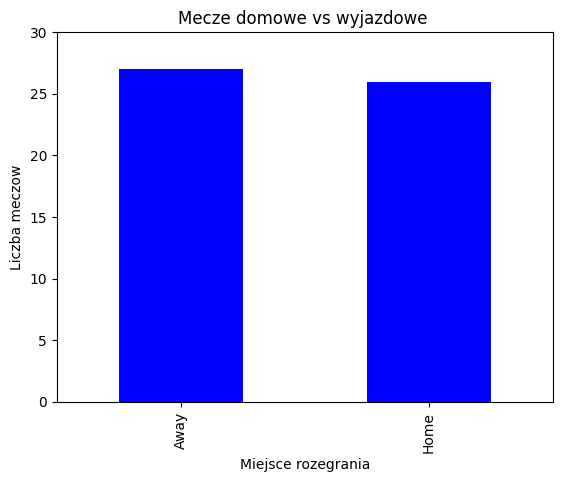

In [22]:
data['Venue'].value_counts().plot(kind='bar', color='blue')
plt.title("Mecze domowe vs wyjazdowe ")
plt.xlabel("Miejsce rozegrania")
plt.ylabel("Liczba meczow") 
plt.ylim(0,30)
plt.show()